In [1]:
#Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Read the UCR dataset
ucr_data = pd.read_csv("FBI's Uniform Crime Reporting (UCR) .xlsx - SLC.csv")

# Read the census dataset
census_data = pd.read_csv('census_data.csv')

In [3]:
# Merge the two datasets on the "Group" column
merged_data = pd.merge(ucr_data, census_data, on='Group')

In [4]:
# Calculate crime rate for each city
merged_data['Crime_Rate'] = merged_data['Incident_ID'] / merged_data['Population']

In [5]:
# Group by city and calculate mean crime rate
crime_rates = merged_data.groupby('Group')['Crime_Rate'].mean().round(2)

print(crime_rates)

Group
NORTH SALT LAKE             7403.21
SALT LAKE CITY             50301.38
SALT LAKE CNTY UNIFD PD     3217.90
SOUTH SALT LAKE             4291.29
Name: Crime_Rate, dtype: float64


In [6]:
# Convert the 'Incident_Date' column to a datetime format
ucr_data['Incident_Date'] = pd.to_datetime(ucr_data['Incident_Date'])

# Group by year and offense type, then calculate the count of incidents
crime_trends = ucr_data.groupby([ucr_data['Incident_Date'].dt.year, 'Offense_Type'])['Incident_ID'].count()

print(crime_trends)

Incident_Date  Offense_Type                               
2020           Aggravated Assault                             1193
               All Other Larceny                              4507
               Arson                                            96
               Assisting or Promoting Prostitution              10
               Bribery                                           1
                                                              ... 
2021           Theft From Motor Vehicle                       6180
               Theft of Motor Vehicle Parts or Accessories    2005
               Weapon Law Violations                           639
               Welfare Fraud                                     2
               Wire Fraud                                      210
Name: Incident_ID, Length: 86, dtype: int64


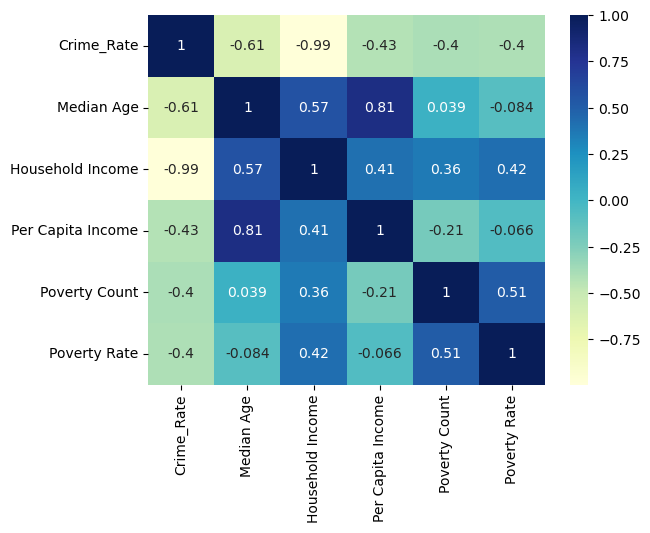

In [7]:
# Plot correlation matrix between crime rate and demographic variables
corr = merged_data[['Crime_Rate', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Select relevant columns for correlation analysis
corr_data = merged_data[['Crime_Rate', 'Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Plot scatter plot matrix
sns.pairplot(corr_data)

In [ ]:
# Fit linear regression models and plot regression line on scatter plots
sns.lmplot(x='Population', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Median Age', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Household Income', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Per Capita Income', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Poverty Count', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Poverty Rate', y='Crime_Rate', data=merged_data)

#Show all plots
plt.show()

In [ ]:
#Fit multiple linear regression model
X = merged_data[['Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']]
y = merged_data['Crime_Rate']

X = sm.add_constant(X) # add constant term to X matrix
model = sm.OLS(y, X).fit() # fit OLS model

#Print model summary
print(model.summary())